### 1. Review Dataset and Build Image Loading Function

In [2]:
import tensorflow as tf
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 1.1 Limit GPU Memory Growth

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#### 1.2 Load Image into TF Data Pipeline

In [5]:
# images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle = False)
# images.as_numpy_iterator().next() # Check whether we load the images dataset

In [4]:
# Function to load image
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [6]:
# images = images.map(load_image)

In [7]:
images.as_numpy_iterator().next() # Check whether the images are transformed as n-d numpy array

array([[[ 73,  88,  81],
        [ 79,  94,  87],
        [ 84,  99,  94],
        ...,
        [ 46,  51,  54],
        [ 44,  52,  55],
        [ 44,  52,  55]],

       [[ 80,  93,  86],
        [ 85, 100,  93],
        [ 90, 103,  96],
        ...,
        [ 45,  50,  53],
        [ 44,  49,  52],
        [ 43,  48,  51]],

       [[ 86,  97,  91],
        [ 80,  93,  86],
        [ 86,  97,  89],
        ...,
        [ 43,  47,  48],
        [ 42,  46,  47],
        [ 40,  44,  45]],

       ...,

       [[ 10,  14,  15],
        [ 11,  15,  16],
        [ 10,  16,  16],
        ...,
        [ 83,  78,  84],
        [ 82,  77,  83],
        [ 81,  76,  82]],

       [[  8,  14,  12],
        [  9,  15,  13],
        [ 10,  16,  14],
        ...,
        [ 83,  78,  84],
        [ 83,  78,  82],
        [ 81,  76,  80]],

       [[  7,  13,  11],
        [  8,  14,  12],
        [  9,  15,  13],
        ...,
        [ 82,  77,  83],
        [ 81,  76,  80],
        [ 80,  75,  79]]

#### 1.3 Visualize images using matplotlib

In [8]:
# Set four images to display
image_generator = images.batch(4).as_numpy_iterator()

In [9]:
plot_images = image_generator.next()

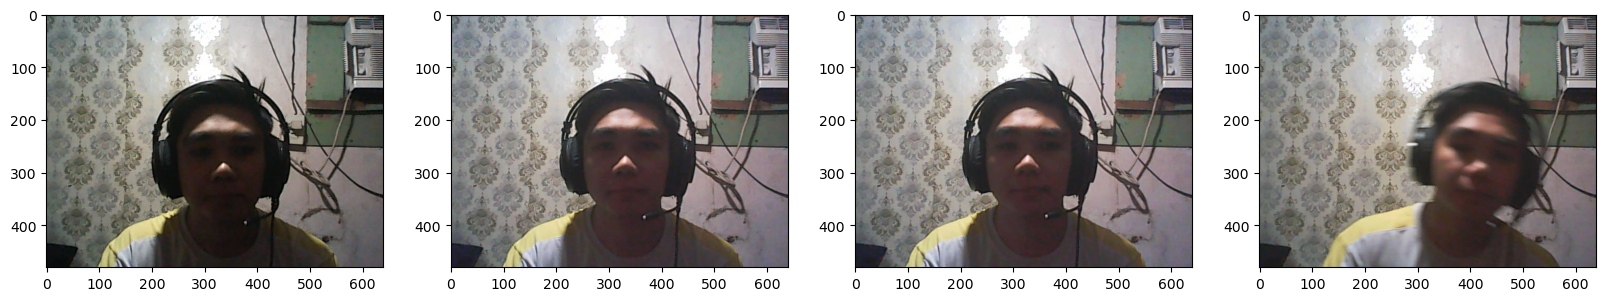

In [10]:
# Plot gathered images using matplotlib
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

### 2. Partition Unaugmented Data

#### 2.1 Split images into Train, Test, and Val

- Total images: 55
- Split ration: 70 / 15 / 15
- Train Images: 55*0.7 = 39 images
- Test Images: 55*0.15 = 8 images
- Validation Images: 55*0.15 = 8 Images

In [5]:
# Create destination folders
import os
PARENT_DIR = os.getcwd()
train_dir_images = os.path.join('data', 'train', 'images')
train_dir_labels = os.path.join('data', 'train', 'labels')

test_dir_images = os.path.join('data', 'test', 'images')
test_dir_labels = os.path.join('data', 'test', 'labels')

val_dir_images = os.path.join('data', 'val', 'images')
val_dir_labels = os.path.join('data', 'val', 'labels')

directories = [train_dir_images, train_dir_labels, test_dir_images, test_dir_labels, val_dir_images, val_dir_labels]

for dir in directories:
    if not os.path.exists(os.path.join(PARENT_DIR, dir)):
        os.makedirs(os.path.join(PARENT_DIR, dir))
        print(f'Successfully created directory {dir}')
    else:
        print(f'{dir} directory already exists.')
# os.path.join(PARENT_DIR, train_dir_images)

data\train\images directory already exists.
data\train\labels directory already exists.
data\test\images directory already exists.
data\test\labels directory already exists.
data\val\images directory already exists.
data\val\labels directory already exists.


Moving 39 images from the source directory to the 'train\images' directory

In [6]:
def move_file(dir):
    if dir == train_dir_images:        
        # print(len(os.listdir(os.path.join(PARENT_DIR, 'data', 'images'))[:39]))

        for file in os.listdir(os.path.join(PARENT_DIR, 'data', 'images'))[:63]:
            filename = file.split('.')[0] + '.jpg'
            src_path = os.path.join(PARENT_DIR, 'data', 'images', filename)
            if os.path.exists(src_path):
                destination_path = os.path.join(PARENT_DIR, dir, filename)
                os.replace(src_path, destination_path)
        print(f'Successfully copied images to directory: {dir}')

    if dir == test_dir_images:

        # print(len(os.listdir(os.path.join(PARENT_DIR, 'data', 'images'))[39:47]))
        for file in os.listdir(os.path.join(PARENT_DIR, 'data', 'images'))[:14]:
            filename = file.split('.')[0] + '.jpg'
            src_path = os.path.join(PARENT_DIR, 'data', 'images', filename)
            if os.path.exists(src_path):
                destination_path = os.path.join(PARENT_DIR, dir, filename)
                os.replace(src_path, destination_path)
        print(f'Successfully copied images to directory: {dir}')

    if dir == val_dir_images:
        # print(len(os.listdir(os.path.join(PARENT_DIR, 'data', 'images'))[47:]))

        for file in os.listdir(os.path.join(PARENT_DIR, 'data', 'images'))[:13]:
            filename = file.split('.')[0] + '.jpg'
            src_path = os.path.join(PARENT_DIR, 'data', 'images', filename)
            if os.path.exists(src_path):
                destination_path = os.path.join(PARENT_DIR, dir, filename)
                os.replace(src_path, destination_path)
        print(f'Successfully copied images to directory: {dir}')

images_dir = directories[0::2]

for dir in images_dir:
    if (len(os.listdir(dir)) == 0):
        move_file(dir)
    else:
        print(f'Images successfully moved to {dir}.')

Images successfully moved to data\train\images.
Images successfully moved to data\test\images.
Images successfully moved to data\val\images.


In [13]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file.split('.')[0] + '.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

### 3. Apply Image Augmentation on Images and Labels using Albumentations

##### 3.1 Setting up Albumentations Transform Pipeline

In [7]:
import albumentations as alb

augmentor = alb.Compose([alb.RandomCrop(450, 450),
                         alb.HorizontalFlip(p = 0.5),
                         alb.RandomBrightnessContrast(p = 0.2),
                         alb.RandomGamma(p = 0.2),
                         alb.RGBShift(p = 0.2),
                         alb.VerticalFlip(p = 0.5)], 
                        bbox_params = alb.BboxParams(format = 'albumentations', 
                                                     label_fields = ['class_labels']))

#### 3.2 Load a test image and annotation with OpenCV and JSON

In [48]:
img = cv2.imread(os.path.join('data', 'train', 'images', '1ef304f8-4f43-11ed-a1fb-40b076d8808d.jpg'))

In [49]:
with open(os.path.join('data', 'train', 'labels', '1ef304f8-4f43-11ed-a1fb-40b076d8808d.json'), 'r') as f:
    label = json.load(f)

In [50]:
label['shapes'][0]

{'label': 'Ains',
 'points': [[339.3137254901961, 166.64705882352942],
  [486.37254901960785, 384.78431372549016]],
 'group_id': None,
 'shape_type': 'rectangle',
 'flags': {}}

#### 3.3 Extract Coordinates and Rescale to Match Image Resolution

In [51]:
coords = np.array(label['shapes'][0]['points'])
coords = coords.flatten()
coords

array([339.31372549, 166.64705882, 486.37254902, 384.78431373])

In [52]:
coords = list(np.divide(coords, [640,480,640,480]))

In [53]:
coords

[0.5301776960784313,
 0.34718137254901965,
 0.7599571078431373,
 0.8016339869281045]

#### 3.4 Apply Augmentations and View Results

In [54]:
augmented = augmentor(image = img, bboxes = [coords], class_labels = ['Ains'])

In [55]:
augmented['bboxes']

[(0.6806971677559913, 0.33254901960784317, 1.0, 0.8172984749455336)]

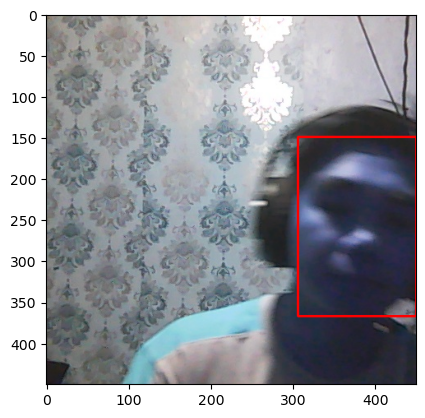

In [56]:
cv2.rectangle(augmented['image'],
            tuple(np.multiply(augmented['bboxes'][0][:2], [450, 450]).astype(int)),
            tuple(np.multiply(augmented['bboxes'][0][2:], [450, 450]).astype(int)),
            (255, 0, 0), 2)
    
plt.imshow(augmented['image'])

### 4. Building Image Augmentation Pipeline

#### 4.1 Run Augmentation Pipeline

In [75]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(120):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['Ains'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.9192708333333334, 0.43194444444444446, 0.671875, 0.7781454248366013, 'Ains'].
x_max is less than or equal to x_min for bbox [0.8863357843137255, 0.427859477124183, 0.6527267156862745, 0.7791666666666667, 'Ains'].
x_max is less than or equal to x_min for bbox [0.8595281862745099, 0.4258169934640523, 0.6404718137254901, 0.7485294117647059, 'Ains'].
x_max is less than or equal to x_min for bbox [0.29810049019607837, 0.47994281045751636, 0.12346813725490198, 0.8128676470588235, 'Ains'].
x_max is less than or equal to x_min for bbox [0.13495710784313725, 0.5544934640522875, 0.0, 0.88125, 'Ains'].
x_max is less than or equal to x_min for bbox [0.18091299019607843, 0.507516339869281, 0.0, 0.8979166666666667, 'Ains'].
x_max is less than or equal to x_min for bbox [0.17708333333333334, 0.4952614379084967, 0.0032169117647058874, 0.8955882352941177, 'Ains'].
x_max is less than or equal to x_min for bbox [0.33026960784313725, 0.40845588235294117, 0.

#### 4.2 Load Augmented Images to Tensorflow Dataset

In [7]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle = False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120, 120)))
train_images = train_images.map(lambda x: x/255)

In [8]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle = False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120, 120)))
test_images = test_images.map(lambda x: x/255)

In [9]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle = False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120, 120)))
val_images = val_images.map(lambda x: x/255)

In [10]:
train_images.as_numpy_iterator().next()

array([[[0.5064951 , 0.47849265, 0.41096812],
        [0.43204656, 0.40392157, 0.35704657],
        [0.74191177, 0.7261642 , 0.63958335],
        ...,
        [0.49626225, 0.5168505 , 0.46194854],
        [0.4699755 , 0.4862745 , 0.43137255],
        [0.48553923, 0.5085784 , 0.44730392]],

       [[0.6125    , 0.61721814, 0.5530025 ],
        [0.2629902 , 0.25465685, 0.20741421],
        [0.75214463, 0.7428309 , 0.6609681 ],
        ...,
        [0.46164215, 0.4689951 , 0.41752452],
        [0.40520832, 0.41991422, 0.36501226],
        [0.46678922, 0.4889093 , 0.4269608 ]],

       [[0.5873774 , 0.59227943, 0.5432598 ],
        [0.23535539, 0.20968138, 0.17591912],
        [0.75625   , 0.7257966 , 0.65177697],
        ...,
        [0.5128676 , 0.52506125, 0.45839462],
        [0.4708946 , 0.48952207, 0.41384804],
        [0.5197304 , 0.53933823, 0.46090686]],

       ...,

       [[0.23713236, 0.18125   , 0.1067402 ],
        [0.23523284, 0.19356617, 0.12248775],
        [0.21960784, 0

### 

### 5. Preparing Labels

In [11]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = 'utf-8') as f:
        label = json.load(f)
    
    return [label['class']], label['bbox']

#### 5.1 Load labels to Tensorflow Dataset

In [12]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle = False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [13]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle = False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [14]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle = False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

### 6. Combine Label and Image Samples

In [15]:
img_labels = [train_images, train_labels,
              test_images, test_labels,
              val_images, val_labels]

for imglbl in img_labels:
    print(len(imglbl))

5400
5400
1200
1200
1080
1080


#### 6.1 Creating Final Datasets (Images/Labels)

In [16]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(8000)
train = train.batch(8)
train = train.prefetch(4)

In [17]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(3300)
test = test.batch(8)
test = test.prefetch(4)

In [18]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(3000)
val = val.batch(8)
val = val.prefetch(4)

#### 6.2 View Images and Annotations

In [19]:
data_samples = train.as_numpy_iterator()

In [39]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


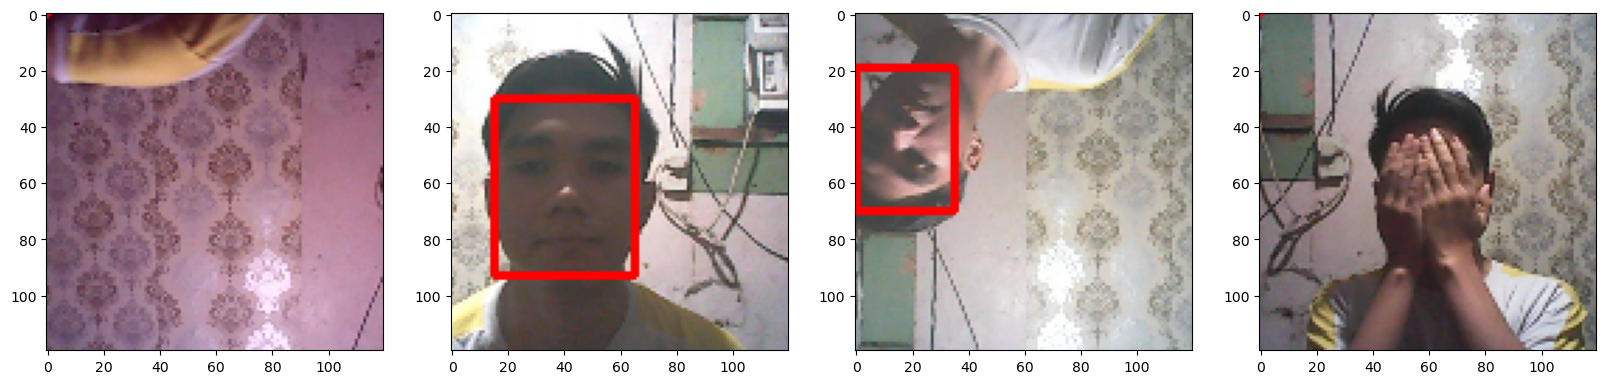

In [40]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                  (255,0,0,0), 2)
    
    ax[idx].imshow(sample_image)

### 7. Build Deep Learning using Functional API

In [4]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from keras.applications import VGG16

vgg = VGG16(include_top = False)

In [5]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

#### 7.1 Build instance of Network

In [6]:
def build_model():
    input_layer = Input(shape = (120, 120, 3))
    
    vgg = VGG16(include_top = False)(input_layer)
    
    # For the classification model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation = 'relu')(f1)
    class2 = Dense(1, activation = 'sigmoid')(class1)
    
    # For the bounding box
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation = 'relu')(f2)
    regress2 = Dense(4, activation = 'sigmoid')(regress1)
    
    tracker = Model(inputs = input_layer, outputs = [class2, regress2])
    
    return tracker

#### 7.2 Testing Neural Network

In [94]:
model = build_model()

In [95]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_15[0][0]']               
                                512)                                                              
                                                                                                  
 global_max_pooling2d_10 (Globa  (None, 512)         0           ['vgg16[0][0]']                  
 lMaxPooling2D)                                                                             

In [96]:
X, y = train.as_numpy_iterator().next()

In [97]:
X.shape

(8, 120, 120, 3)

In [98]:
classes, coords = model.predict(X)

1/1 [==============================] - 0s 248ms/step


In [99]:
classes, coords

(array([[0.5852392 ],
        [0.5757539 ],
        [0.50506765],
        [0.5302302 ],
        [0.552911  ],
        [0.54366165],
        [0.5320177 ],
        [0.5502513 ]], dtype=float32),
 array([[0.5064372 , 0.40481466, 0.44436872, 0.61633223],
        [0.5570445 , 0.47850403, 0.5441475 , 0.54675496],
        [0.5440534 , 0.45713967, 0.5071971 , 0.5554536 ],
        [0.51387894, 0.39631188, 0.5048346 , 0.5631496 ],
        [0.53120637, 0.50273675, 0.47481167, 0.58253884],
        [0.56690377, 0.52703184, 0.53986275, 0.6597288 ],
        [0.48841274, 0.49473846, 0.43652758, 0.5768467 ],
        [0.6578889 , 0.5193412 , 0.48874027, 0.63528025]], dtype=float32))

### 8. Defining Losses and Optimizers

#### 8.1 Define optimizer and LR

In [100]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [101]:
lr_decay

0.0004938271604938271

In [102]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001, decay = lr_decay)

#### 8.2 Defining Localization Loss and Classification Loss

In [103]:
def localization_loss(y_true, y_pred):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - y_pred[:,:2]))
    
    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]
    
    h_pred = y_pred[:,3] - y_pred[:,1]
    w_pred = y_pred[:,2] - y_pred[:,0]
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    
    return delta_coord + delta_size

In [104]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

#### 8.3 Testing localization loss metric

In [105]:
localization_loss(y[1], coords).numpy()

3.7958467

In [106]:
classloss(y[0], coords).numpy()

0.6790259

### 9. Training Neural Network

#### 9.1 Creating custom Model class

In [107]:
class Tracker(Model): 
    def __init__(self, tracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = tracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [108]:
FaceRecognition = Tracker(model)

In [109]:
FaceRecognition.compile(opt, classloss, regressloss)

#### 9.2 Train FaceRecognition model

In [110]:
log_dir = 'logs'

In [111]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

In [112]:
hist = FaceRecognition.fit(train, epochs = 10, validation_data = val,
                           callbacks = [tensorboard_callback])

Epoch 1/10
675/675 [==============================] - 122s 159ms/step - total_loss: 0.2222 - class_loss: 0.0748 - regress_loss: 0.1848 - val_total_loss: 0.0631 - val_class_loss: 0.0049 - val_regress_loss: 0.0606
Epoch 2/10
675/675 [==============================] - 118s 155ms/step - total_loss: 0.0401 - class_loss: 0.0134 - regress_loss: 0.0334 - val_total_loss: 0.0216 - val_class_loss: 7.2843e-04 - val_regress_loss: 0.0213
Epoch 3/10
675/675 [==============================] - 128s 166ms/step - total_loss: 0.0163 - class_loss: 0.0049 - regress_loss: 0.0138 - val_total_loss: 0.0569 - val_class_loss: 0.0013 - val_regress_loss: 0.0562
Epoch 4/10
675/675 [==============================] - 127s 165ms/step - total_loss: 0.0342 - class_loss: 0.0135 - regress_loss: 0.0274 - val_total_loss: 0.0327 - val_class_loss: 3.2325e-04 - val_regress_loss: 0.0325
Epoch 5/10
675/675 [==============================] - 133s 169ms/step - total_loss: 0.0264 - class_loss: 0.0081 - regress_loss: 0.0223 - val_tot

#### 9.3 Plot model performance

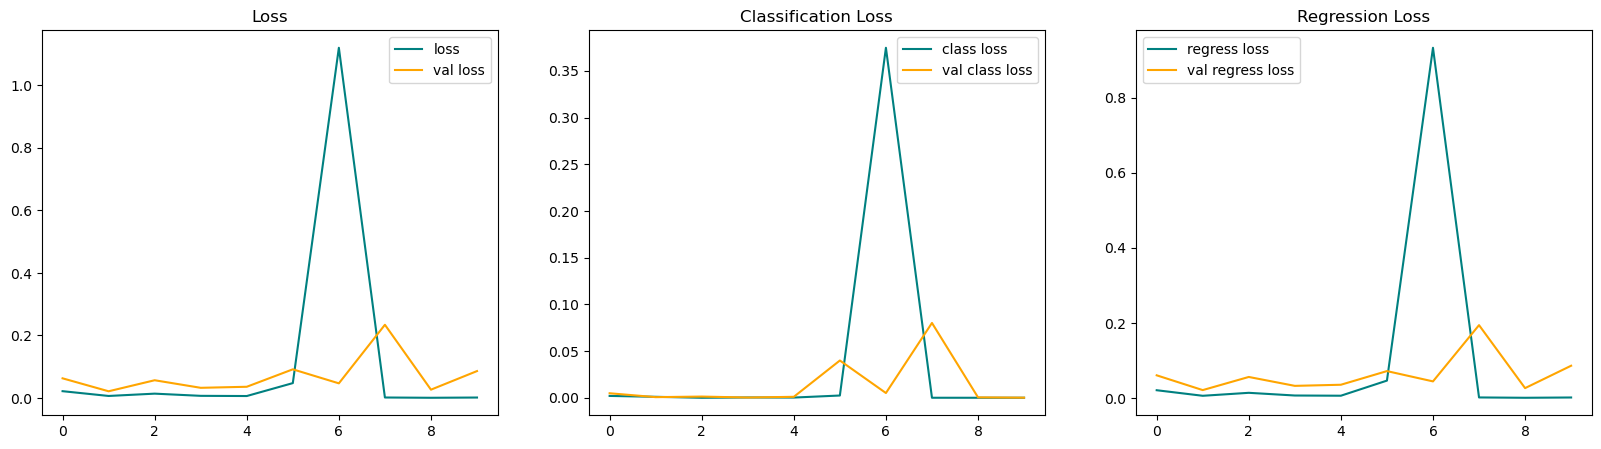

In [113]:
fig, ax = plt.subplots(ncols = 3, figsize = (20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

### 10. Making Predictions and Real-time predictions

#### 10.1 Predicting on Test set

In [114]:
test_data = test.as_numpy_iterator()

In [115]:
test_sample = test_data.next()

In [116]:
y_pred = model.predict(test_sample[0])

1/1 [==============================] - 0s 42ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


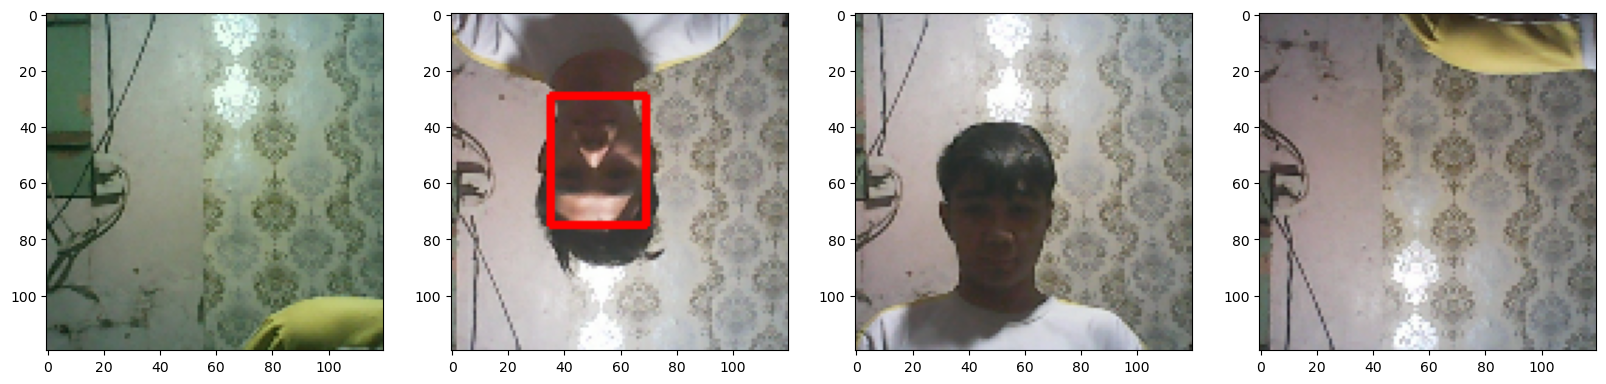

In [117]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = y_pred[1][idx]
    
    if y_pred[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

#### 10.2 Saving model

In [8]:
from keras.models import load_model
# model.save('FaceTracker.h5')
model = load_model('FaceTracker.h5')

****
#### Real Time Detection

Testing camera

In [119]:
# Testing camera
vid = cv2.VideoCapture(0)

while(True):
    ret, frame = vid.read()
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
vid.release()
cv2.destroyAllWindows()

In [9]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = model.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'Ains', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 1, cv2.LINE_AA)
    
    cv2.imshow('Face Recognition', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 39ms/step
